# CAT & DOG IMAGE CLASSIFICATION PROJECT

# Data Import & Visualisation

In [16]:
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

In [17]:
cat4 = cv2.imread('CATS_DOGS/CATS_DOGS/train/CAT/4.jpg')

In [18]:
cat4 = cv2.cvtColor(cat4,cv2.COLOR_BGR2RGB)

In [9]:
type(cat4)

numpy.ndarray

In [10]:
cat4.shape

(375, 500, 3)

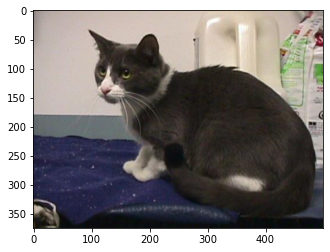

In [11]:
plt.imshow(cat4)

In [22]:
dog2 = cv2.imread('CATS_DOGS/CATS_DOGS/train/DOG/2.jpg')
dog2 = cv2.cvtColor(dog2,cv2.COLOR_BGR2RGB)

In [23]:
dog2.shape

(199, 188, 3)

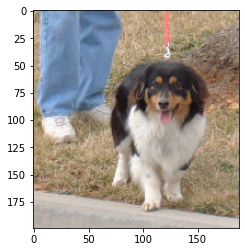

In [24]:
plt.imshow(dog2)

# Preparing the Data for the model
### Image Manipulation

In [25]:
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [26]:
image_gen = ImageDataGenerator(rotation_range=30, # rotate the image 30 degrees
                               width_shift_range=0.1, # Shift the pic width by a max of 10%
                               height_shift_range=0.1, # Shift the pic height by a max of 10%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.2, # Shear means cutting away part of the image (max 20%)
                               zoom_range=0.2, # Zoom in by 20% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

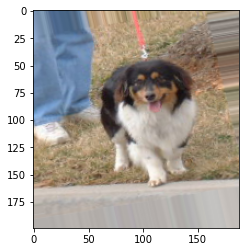

In [27]:
plt.imshow(image_gen.random_transform(dog2))

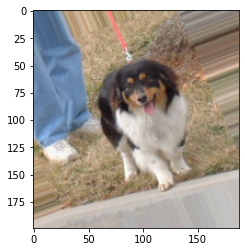

In [28]:
plt.imshow(image_gen.random_transform(dog2))

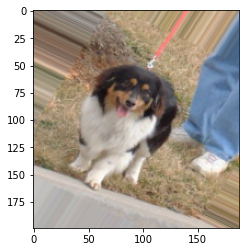

In [29]:
plt.imshow(image_gen.random_transform(dog2))

### Generating many manipulated images from a directory

In [31]:
image_gen.flow_from_directory('CATS_DOGS/CATS_DOGS/train')

Found 18743 images belonging to 2 classes.


In [32]:
image_gen.flow_from_directory('CATS_DOGS/CATS_DOGS/test')

Found 6251 images belonging to 2 classes.


### Resizing Images

 Keras resizing all the images to 150 pixels by 150 pixels once they've been manipulated.

In [33]:
# width,height,channels
image_shape = (150,150,3)

# Model Creation

In [34]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [35]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))


model.add(Dropout(0.5)) #50% neuron off, avoids overfitting. 

# Last layer;binary-- 0=cat , 1=dog
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [36]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18496)            

# Model Training

In [38]:
batch_size = 16

train_image_gen = image_gen.flow_from_directory('CATS_DOGS/CATS_DOGS/train',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 18743 images belonging to 2 classes.


In [39]:
test_image_gen = image_gen.flow_from_directory('CATS_DOGS/CATS_DOGS/test',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 6251 images belonging to 2 classes.


In [40]:
train_image_gen.class_indices

{'CAT': 0, 'DOG': 1}

In [41]:
import warnings
warnings.filterwarnings('ignore')

In [42]:
results = model.fit_generator(train_image_gen,epochs=100,
                              steps_per_epoch=150, # means 16*150 images for a single epoch instead of 18743,saves training time. 
                              validation_data=test_image_gen,
                             validation_steps=12)

Epoch 1/100
150/150 [==============================] - 106s 708ms/step - loss: 0.6979 - accuracy: 0.5188 - val_loss: 0.6932 - val_accuracy: 0.5573
Epoch 2/100
150/150 [==============================] - 109s 726ms/step - loss: 0.6925 - accuracy: 0.5069 - val_loss: 0.7020 - val_accuracy: 0.5521
Epoch 3/100
150/150 [==============================] - 176s 1s/step - loss: 0.6874 - accuracy: 0.5358 - val_loss: 0.6935 - val_accuracy: 0.5365
Epoch 4/100
150/150 [==============================] - 141s 943ms/step - loss: 0.6858 - accuracy: 0.5617 - val_loss: 0.6508 - val_accuracy: 0.5990
Epoch 5/100
150/150 [==============================] - 142s 947ms/step - loss: 0.6820 - accuracy: 0.5667 - val_loss: 0.6521 - val_accuracy: 0.5469
Epoch 6/100
150/150 [==============================] - 142s 946ms/step - loss: 0.6749 - accuracy: 0.5871 - val_loss: 0.6956 - val_accuracy: 0.6771
Epoch 7/100
150/150 [==============================] - 141s 939ms/step - loss: 0.6694 - accuracy: 0.5938 - val_loss: 0.58

In [25]:
# model.save('cat_dog2.h5')

# Model Evaluation

In [45]:
results.history['accuracy']

[0.51875,
 0.5069009,
 0.53583336,
 0.56166667,
 0.56666666,
 0.58708334,
 0.59375,
 0.59041667,
 0.61083335,
 0.59,
 0.61791664,
 0.62875,
 0.6508333,
 0.6373902,
 0.67041665,
 0.6575,
 0.68375,
 0.6863237,
 0.6825,
 0.69708335,
 0.68541664,
 0.7104167,
 0.70125,
 0.71166664,
 0.7266667,
 0.7210372,
 0.7275,
 0.73791665,
 0.7241667,
 0.7216667,
 0.71375,
 0.7391667,
 0.74375,
 0.72083336,
 0.7529167,
 0.74875,
 0.73833334,
 0.7373484,
 0.7529167,
 0.7554167,
 0.7457131,
 0.7529167,
 0.75416666,
 0.7579167,
 0.75916666,
 0.77125,
 0.76875,
 0.75666666,
 0.77708334,
 0.76125,
 0.75958335,
 0.7728984,
 0.76625,
 0.76375,
 0.7808333,
 0.7554167,
 0.76787955,
 0.77458334,
 0.77875,
 0.77375,
 0.7808333,
 0.7891667,
 0.77875364,
 0.79875,
 0.77916664,
 0.79583335,
 0.77791667,
 0.8045833,
 0.78541666,
 0.78541666,
 0.79083335,
 0.79375,
 0.80291665,
 0.7891667,
 0.775,
 0.7966667,
 0.80083334,
 0.81095773,
 0.805,
 0.78791666,
 0.80291665,
 0.8076119,
 0.8016667,
 0.79291666,
 0.81166667,
 

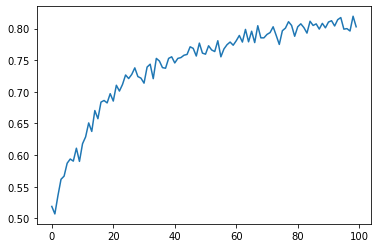

In [46]:
plt.plot(results.history['accuracy'])

In [47]:
 model.save('cat_dog_100epochs.h5')

# Predicting on new images

In [48]:
train_image_gen.class_indices

{'CAT': 0, 'DOG': 1}

In [50]:
from keras.models import load_model
new_model = load_model('cat_dog_100epochs.h5')

In [51]:
import numpy as np
from keras.preprocessing import image

dog_file = 'CATS_DOGS/CATS_DOGS/train/Dog/2.jpg'

dog_img = image.load_img(dog_file, target_size=(150, 150))

dog_img = image.img_to_array(dog_img)

dog_img = np.expand_dims(dog_img, axis=0) # so that neural network thinks that its a batch of 1 image
dog_img = dog_img/255

In [52]:
prediction_prob = model.predict(dog_img)

In [54]:
# Output prediction
print(f'Probability that image is a dog is: {prediction_prob} ')

Probability that image is a dog is: [[0.8603622]] 
